<a href="https://colab.research.google.com/github/AlwaysEden/Machine-Learning-HW/blob/main/HW5_kMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mount your drive
from google.colab import drive
drive.mount('/content/drive')

# Code

1.   Load the MNIST dataset as in Homework 1.
Filter the dataset into a subset that contains only the '3' and '9' images.

2.   Implement and run the kMeans algorithm on this subset with k = 2, 3, 5, 10.

3.   Reduce the dimensionality of the raw '3' and '9' images of the subset from 784 to eigenspaces 2, 5 and 10 dimensions (that is, you will have 3 new datasets). Implement and run the kMeans algorithm on these new subsets with k = 2, 3, 5, 10.

In total, you'd run your kMeans 16 times.

In [23]:
import six.moves.cPickle as pickle
import gzip
import os
import numpy as np
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
def load_data(dataset):

    # Download the MNIST dataset if it is not present
    if not os.path.isfile(dataset):
        origin = (
            'http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz'
        )
        print('Downloading data from %s' % origin)
        urllib.request.urlretrieve(origin, dataset)

    print('Loading data...')

    # Load the dataset
    with gzip.open(dataset, 'rb') as f:
        try:
            train_set, valid_set, test_set = pickle.load(f, encoding='latin1')
        except:
            train_set, valid_set, test_set = pickle.load(f)

    all_data_x = np.concatenate([train_set[0], valid_set[0], test_set[0]])
    all_data_y = np.concatenate([train_set[1], valid_set[1], test_set[1]])

    print('... data has been loaded!')
    return all_data_x, all_data_y

In [25]:
# k = 2, 3, 5, 10

#Create the k
def create_k(number_of_k, images):
  k = [None] * number_of_k
  for i in range(number_of_k):
    k_index = np.random.randint(0, len(images))
    k[i] = images[k_index].copy()
  return k

def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1 - x2) ** 2))
    return distance

def clustering(k, cluster, images):
  for i in range(len(images)):
    distances = [None] * len(k)
    for j in range(len(k)):
      distances[j] = euclidean_distance(images[i], k[j])
    cluster[i] = np.argmin(distances)

def kMeans(num_k, images):
  cluster = [None] * len(images)
  k = create_k(num_k, images) # Assign k randomly
  tolerance = 0.0001 # Check if the mean change
  stop_signal = 0
  while stop_signal < num_k:
    clustering(k, cluster, images)
    for i in range(num_k):
      cluster_index = np.where(np.array(cluster)==i)[0]
      mean = np.mean(images[cluster_index], axis=0)
      if np.linalg.norm(mean - k[i]) < tolerance:
        stop_signal += 1
      k[i] = mean.copy()

  return cluster.copy()

def showImages(k, cluster, images):
  index = [None] * k
  for i in range(k):
    index[i] = np.where(np.array(cluster)==i)[0]

  for x in range(k):
    for i in index[x]:
      plt.imshow(images[i].reshape(28,28))
      plt.show()
      if i > 50:
        print("***********************************")
        break

In [26]:
#Load the data into train, validation and test sets
data_x, data_y= load_data('mnist.pkl.gz')

indices_3 = np.where(data_y == 3)[0]
indices_9 = np.where(data_y == 9)[0]

images_3 = data_x[indices_3]
images_9 = data_x[indices_9]

images = np.concatenate([images_3, images_9])
np.random.shuffle(images)
#labels = np.concatenate([np.zeros(len(images_3)), np.ones(len(images_9))])

Loading data...
... data has been loaded!


In [ ]:
# This code part: dim 784, k = 2, 3, 5, 10

# k = 2, dim = 784
cluster_2_784 = kMeans(2, images)

# k = 3, dim = 784
cluster_3_784 = kMeans(3, images)

# k = 5, dim = 784
cluster_5_784 = kMeans(5, images)

# k = 10, dim = 784
cluster_10_784 = kMeans(10, images)

In [ ]:
# Roughly Checking Cluster
#control k and cluster name(cluster_2_784, cluster_3_784, cluster_5_784, cluster_10_784)
print("*****k=2, dim = 784******")
showImages(2, cluster_2_784, images)
print("*****k=3, dim = 784******")
showImages(3, cluster_3_784, images)
print("*****k=5, dim = 784******")
showImages(5, cluster_5_784, images)
print("*****k=10, dim = 784******")
showImages(10, cluster_10_784, images)

In [ ]:
# This code part: dim 2, k = 2, 3, 5, 10
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#PCA, reduce the dimensions into 2
scaler = StandardScaler()
scaled_data = scaler.fit_transform(images)

pca = PCA(n_components=2)  # Reduce the dimension into 2

scaled_images = pca.fit_transform(scaled_data)

# k = 2, dim = 2
cluster_2_2 = kMeans(2, scaled_images)

# k = 3, dim = 2
cluster_3_2 = kMeans(3, scaled_images)

# k = 5, dim = 2
cluster_5_2 = kMeans(5, scaled_images)

# k = 10, dim = 2
cluster_10_2 = kMeans(10, scaled_images)

In [ ]:
# Roughly Checking Cluster
#control k and cluster name(cluster_2_2, cluster_3_2, cluster_5_2, cluster_10_2)
print("*****k=2, dim = 2******")
showImages(2, cluster_2_2, images)
print("*****k=3, dim = 2******")
showImages(3, cluster_3_2, images)
print("*****k=5, dim = 2******")
showImages(5, cluster_5_2, images)
print("*****k=10, dim = 2******")
showImages(10, cluster_10_2, images)

In [ ]:
# This code part: dim 5, k = 2, 3, 5, 10
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#PCA, reduce the dimensions into 5
scaler = StandardScaler()
scaled_data = scaler.fit_transform(images)

pca = PCA(n_components=5)  # reduce the dimension into 5

scaled_images = pca.fit_transform(scaled_data)

# k = 2, dim = 5
cluster_2_5 = kMeans(2, scaled_images)

# k = 3, dim = 5
cluster_3_5 = kMeans(3, scaled_images)

# k = 5, dim = 5
cluster_5_5 = kMeans(5, scaled_images)

# k = 10, dim = 5
cluster_10_5 = kMeans(10, scaled_images)

*****k=2, dim = 2******


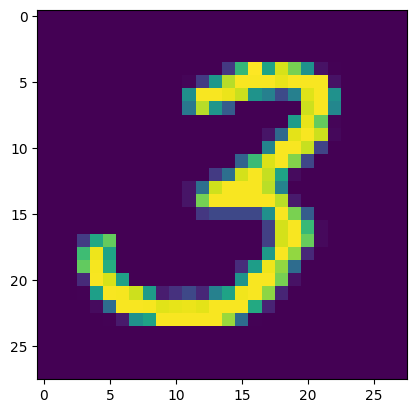

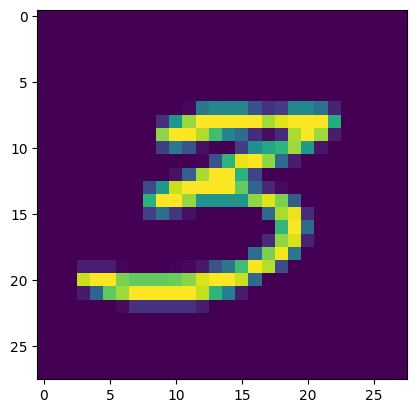

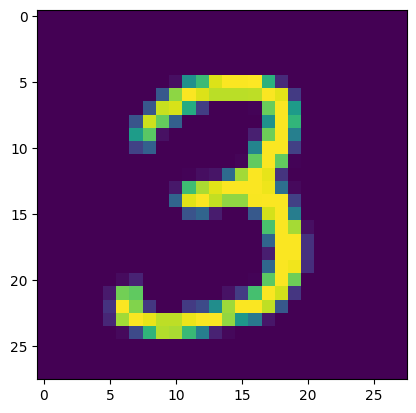

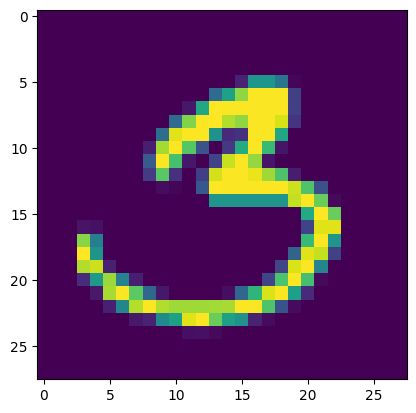

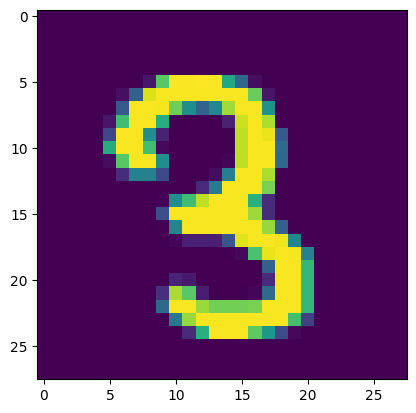

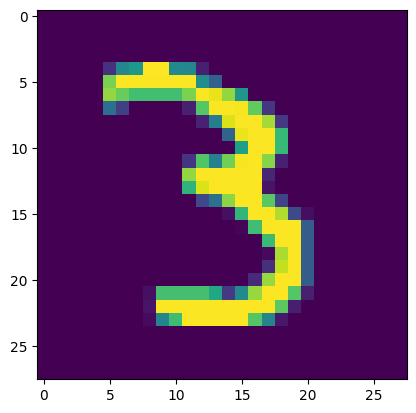

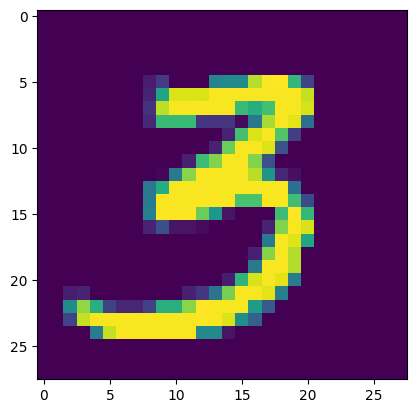

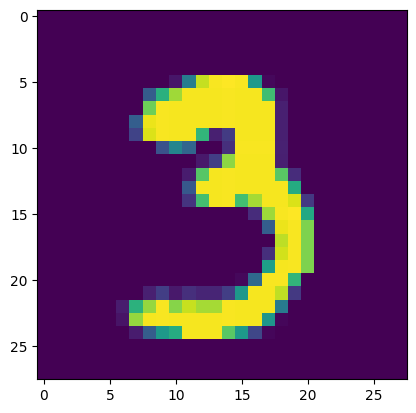

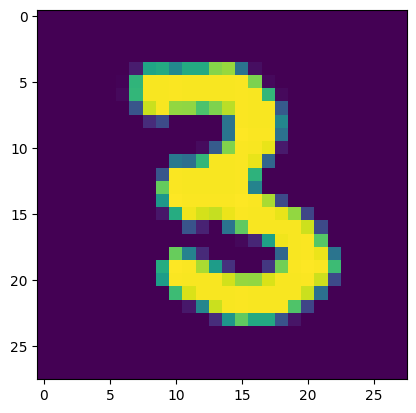

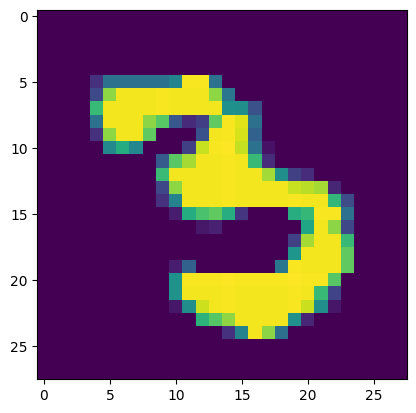

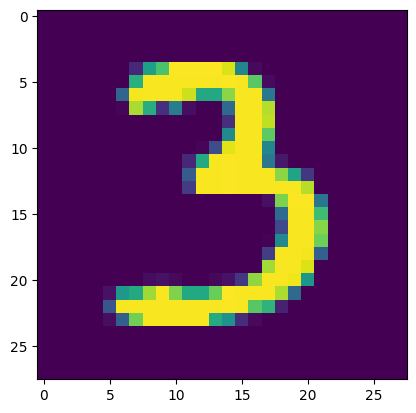

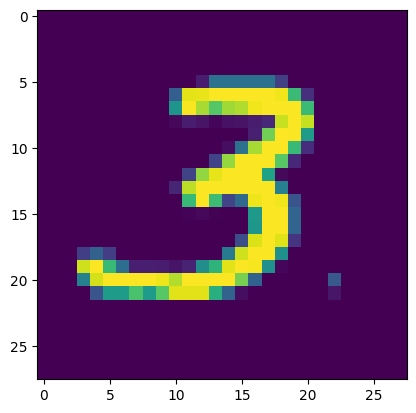

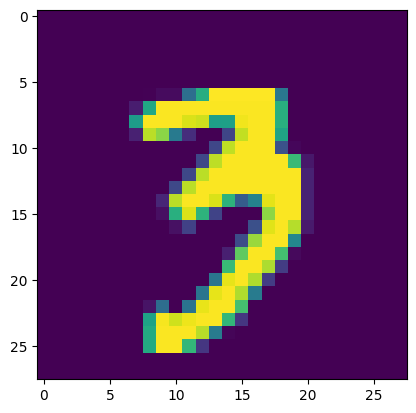

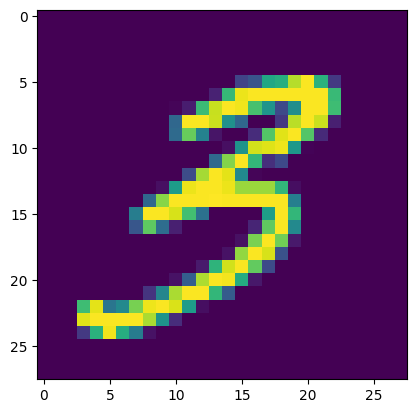

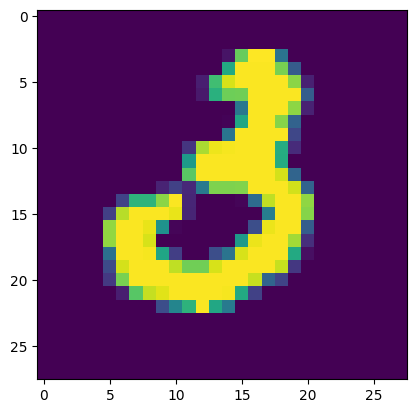

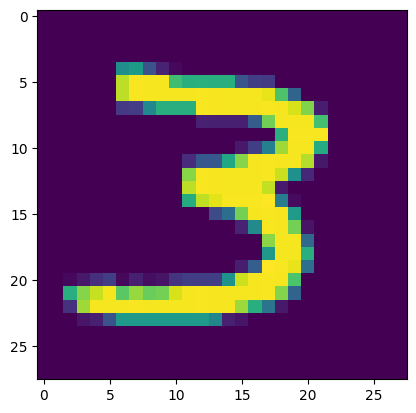

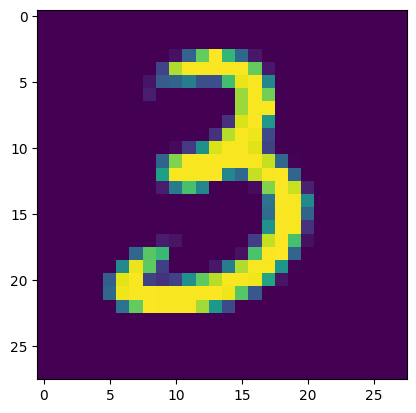

***********************************


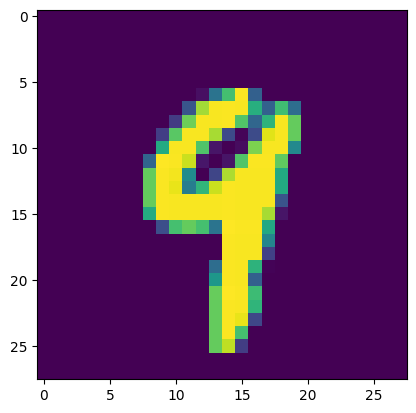

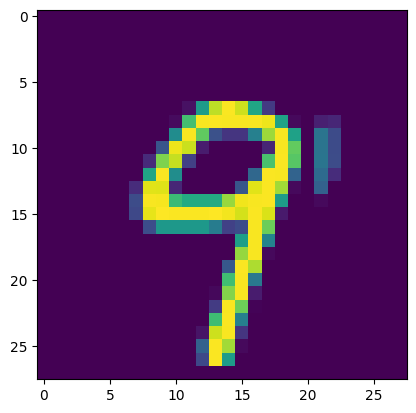

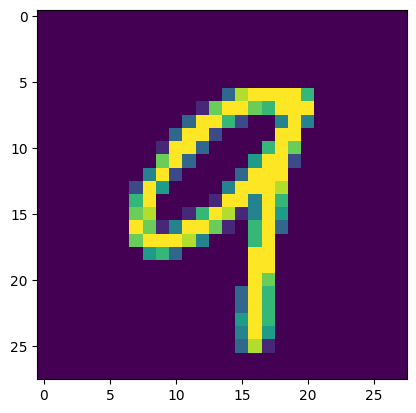

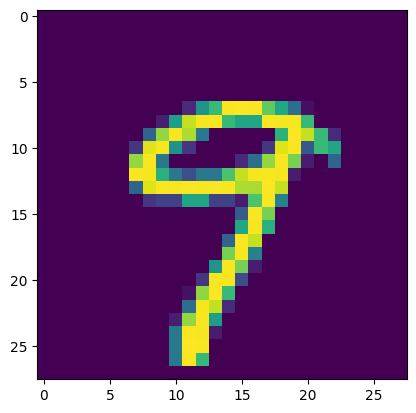

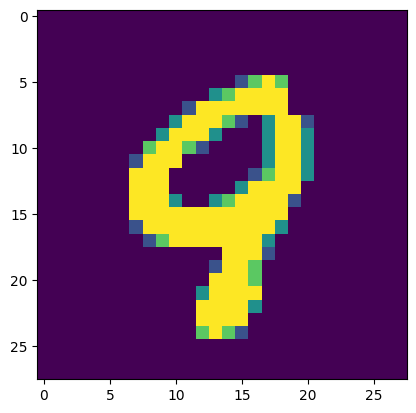

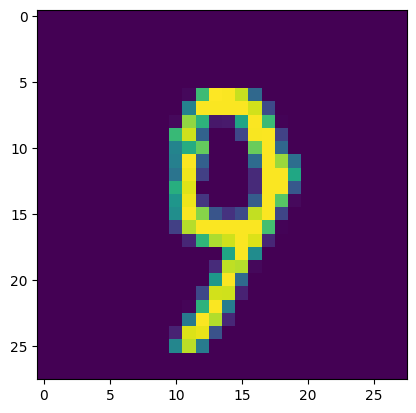

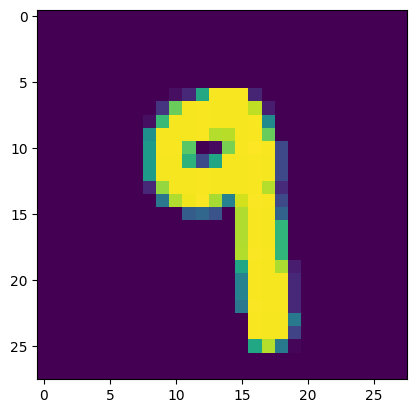

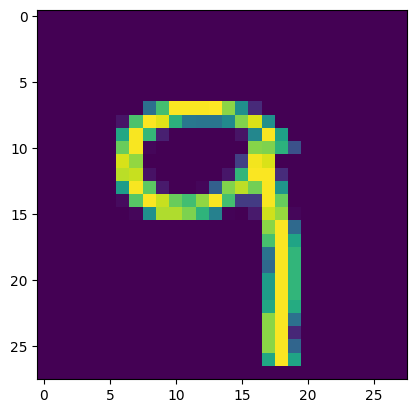

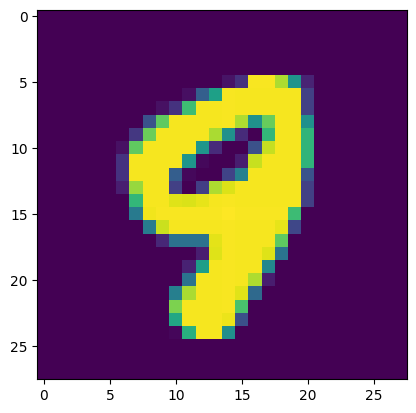

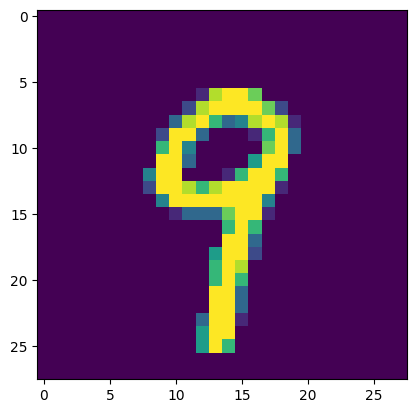

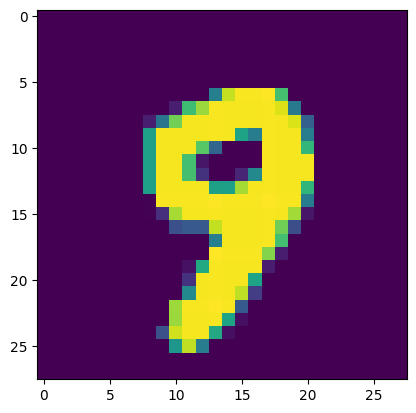

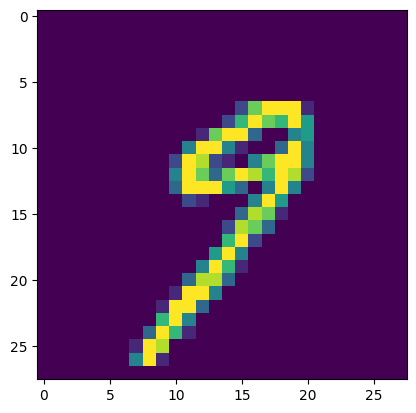

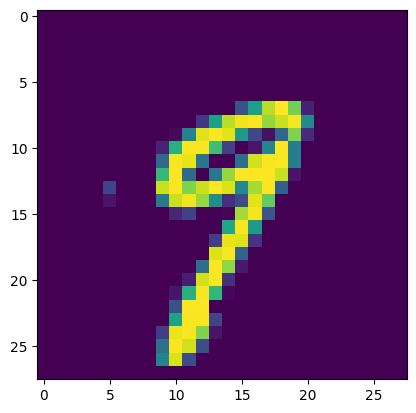

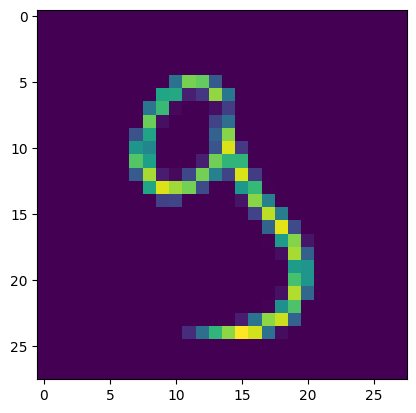

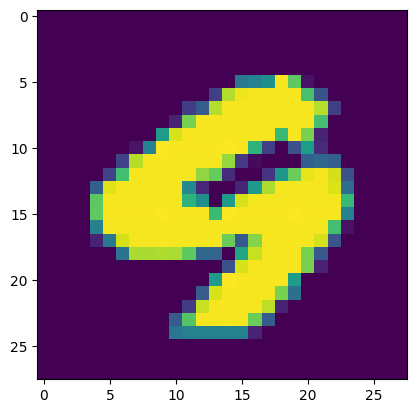

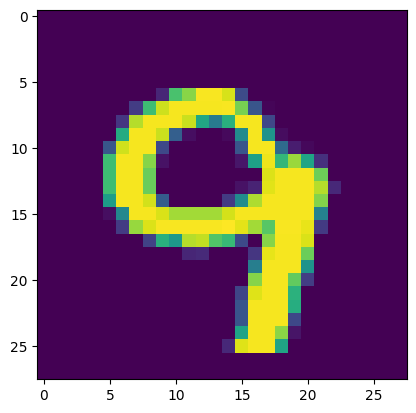

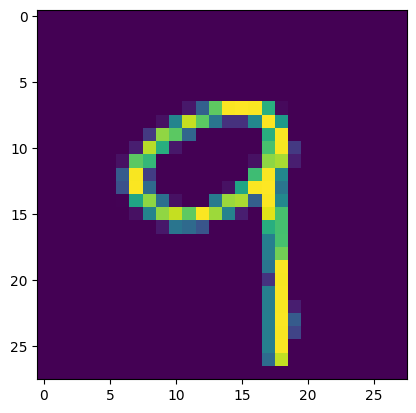

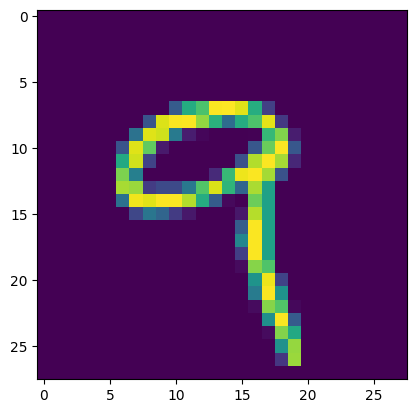

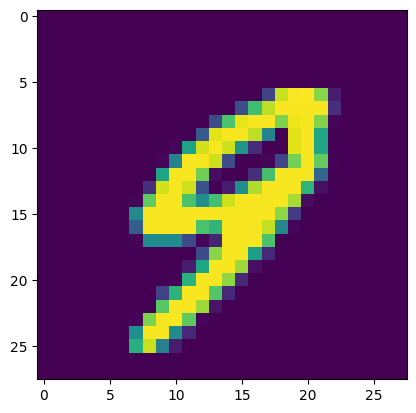

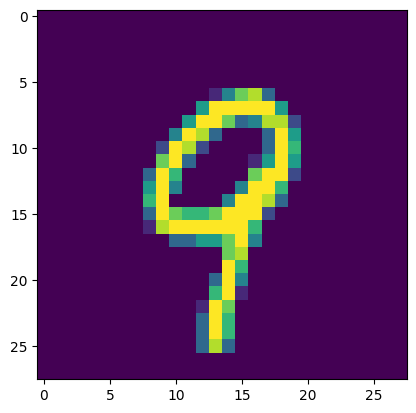

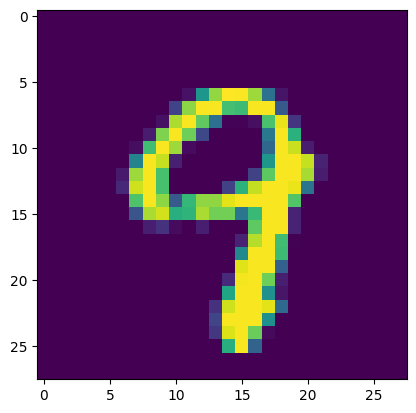

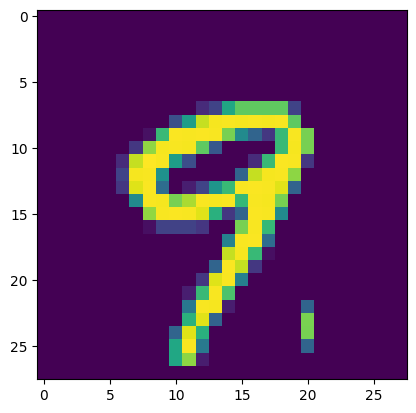

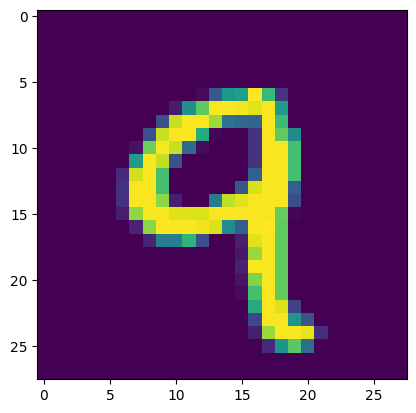

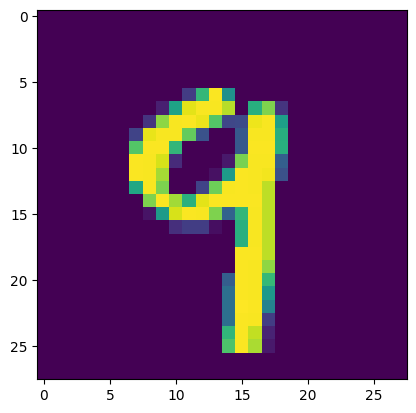

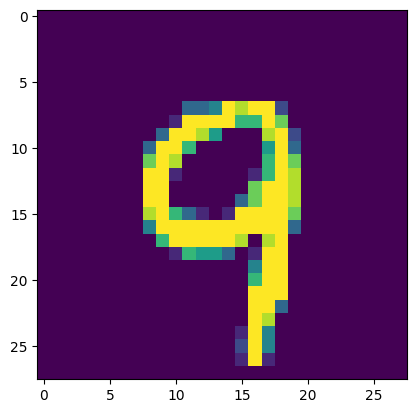

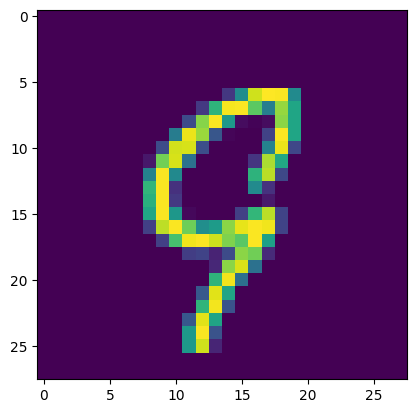

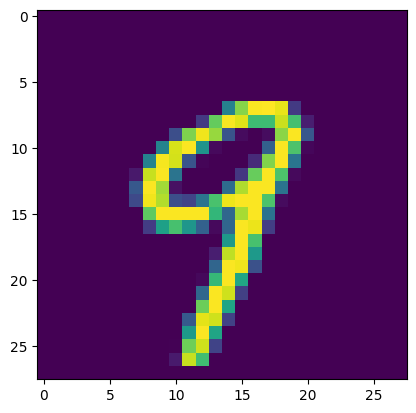

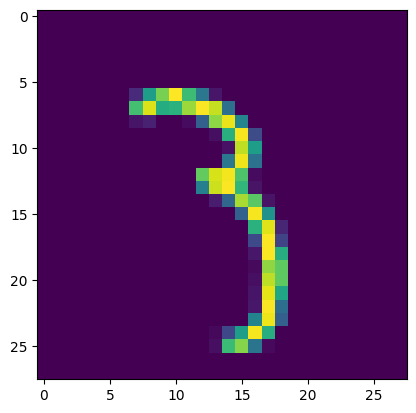

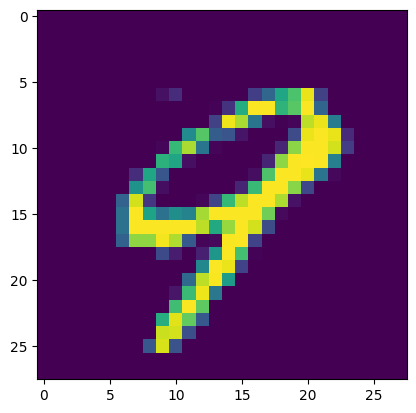

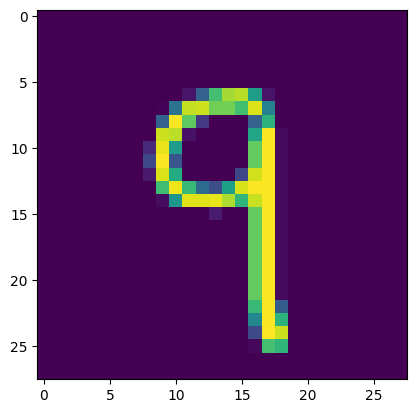

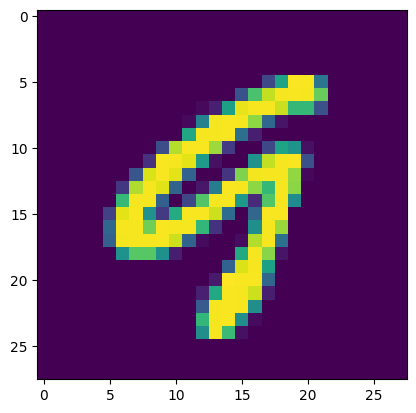

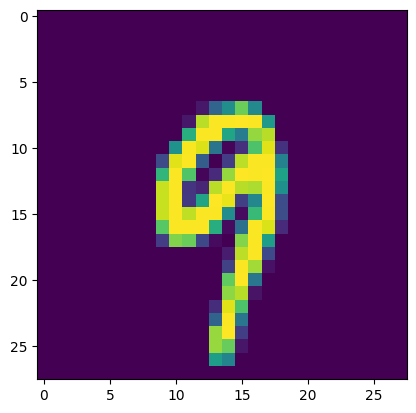

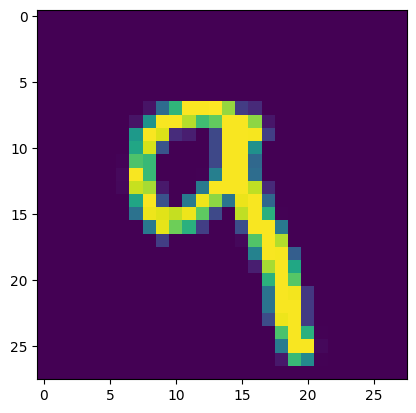

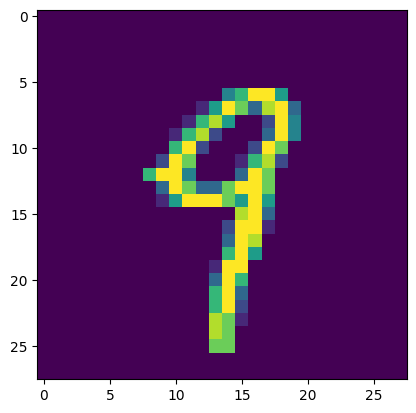

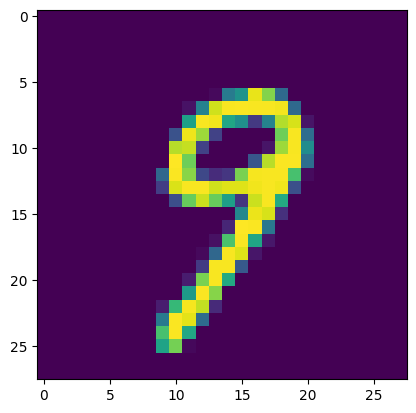

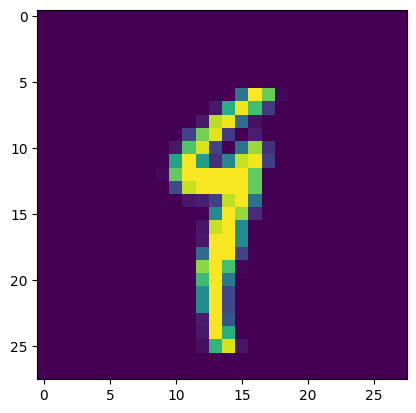

***********************************
*****k=3, dim = 2******


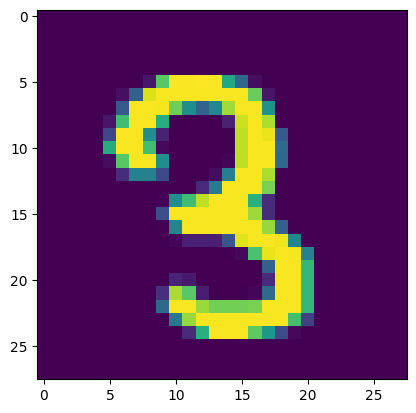

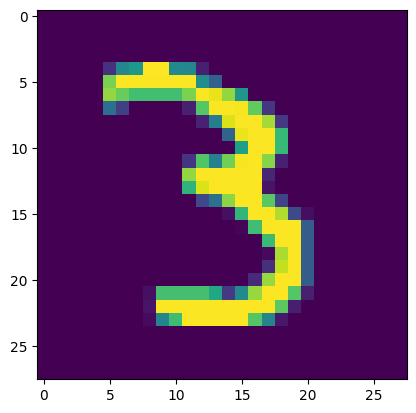

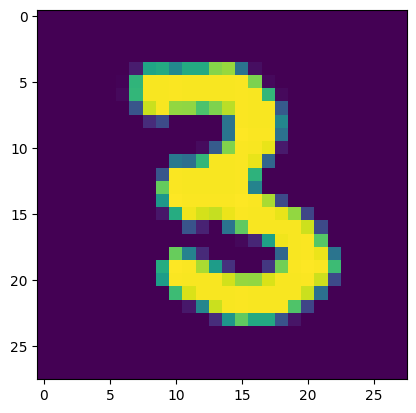

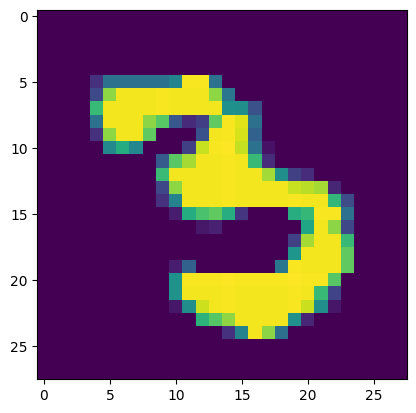

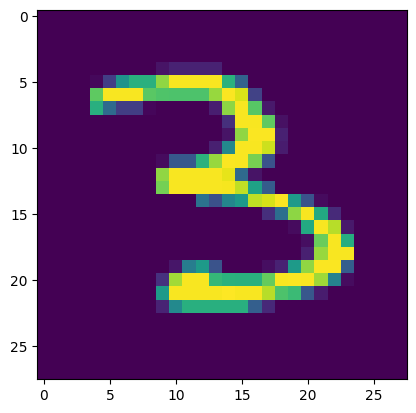

***********************************


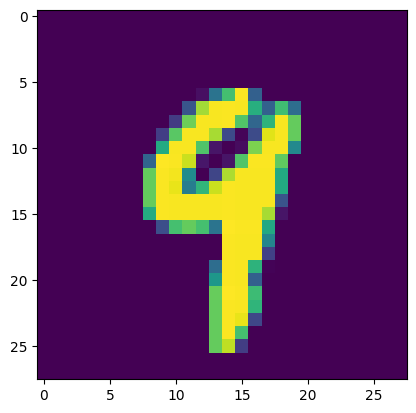

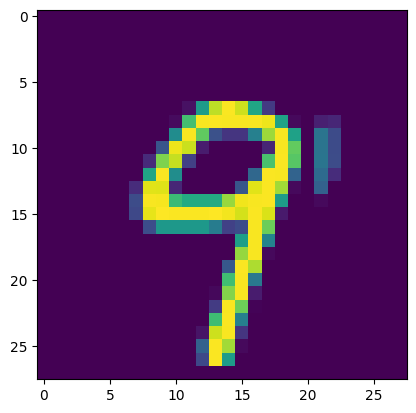

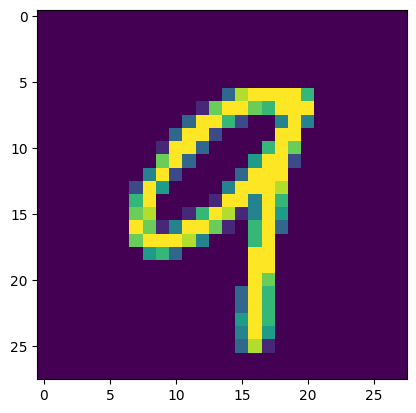

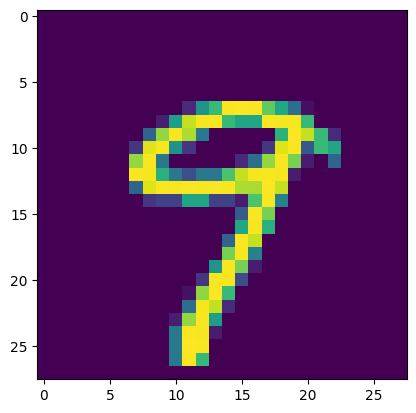

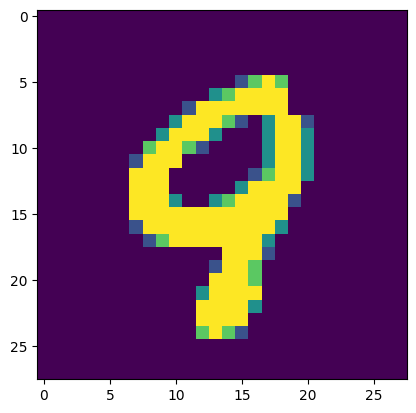

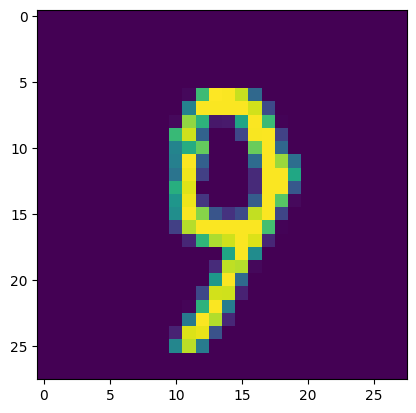

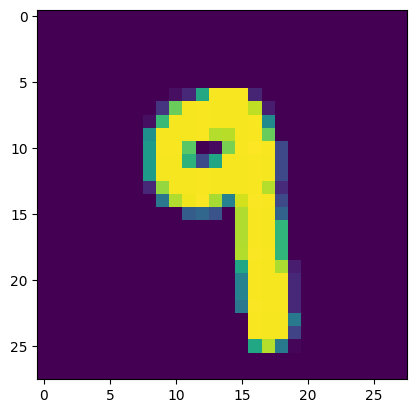

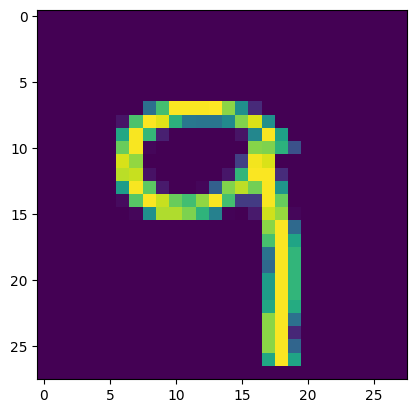

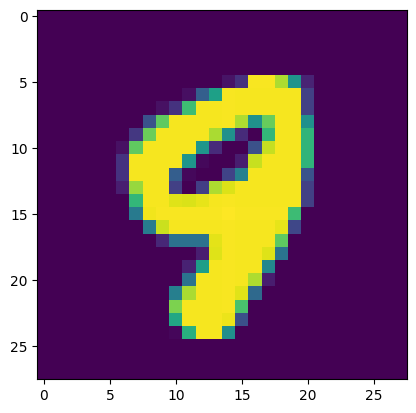

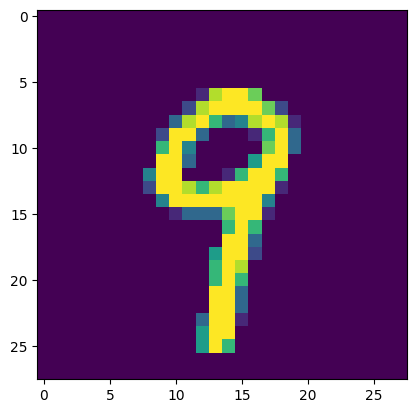

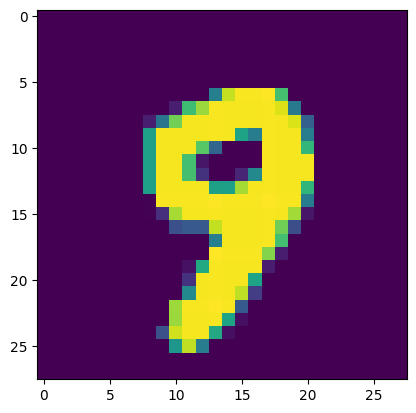

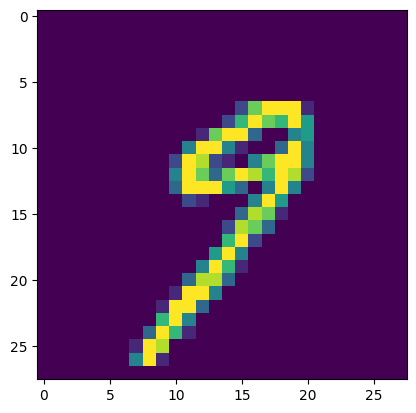

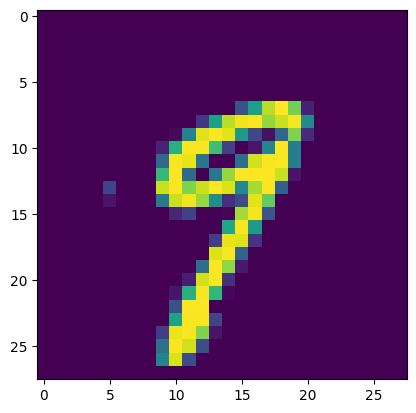

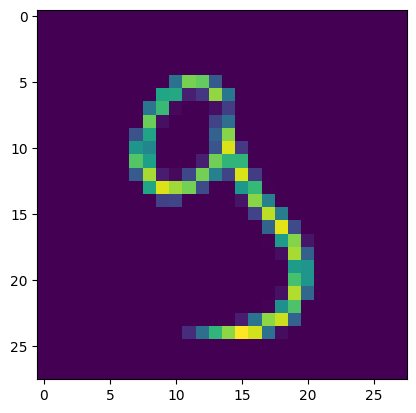

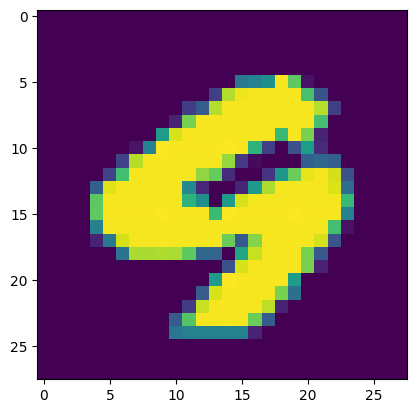

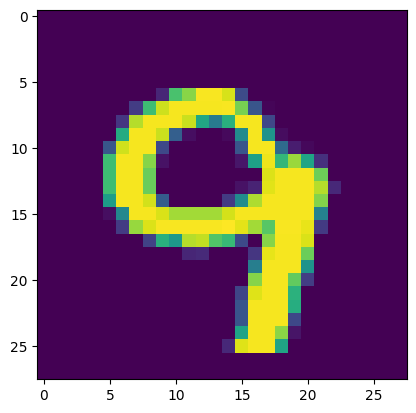

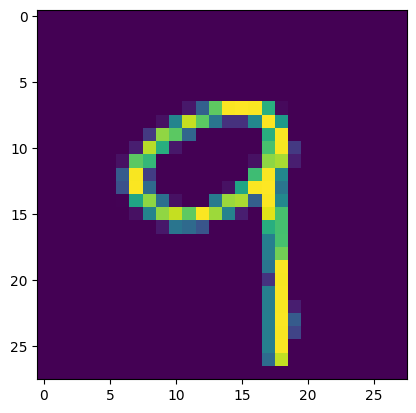

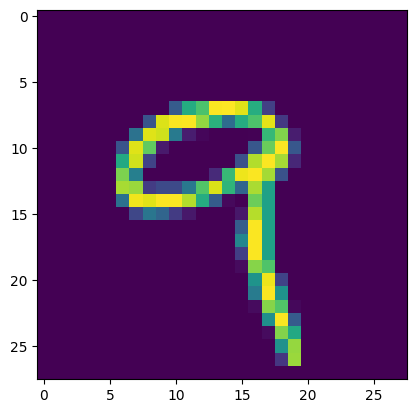

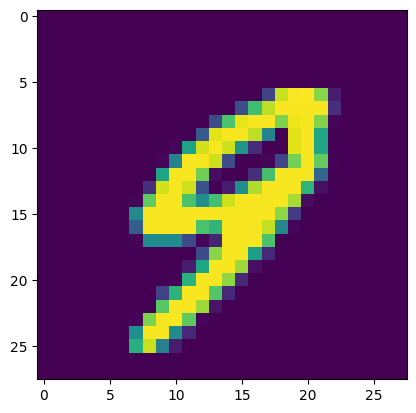

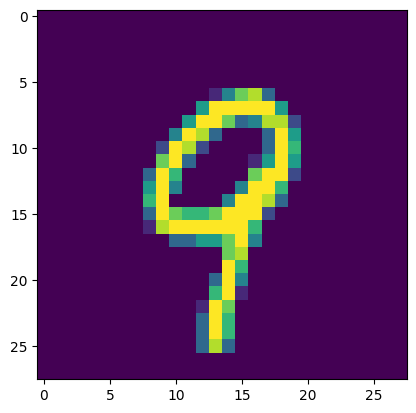

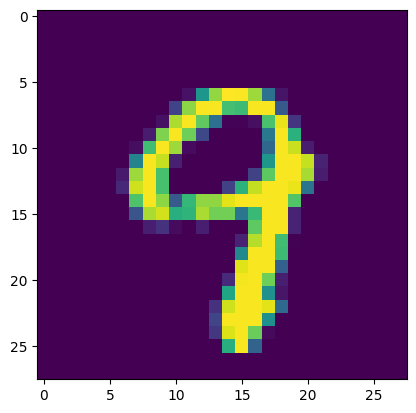

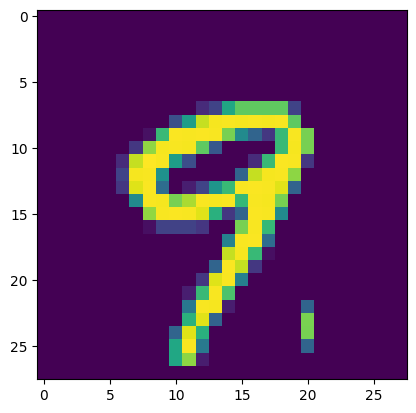

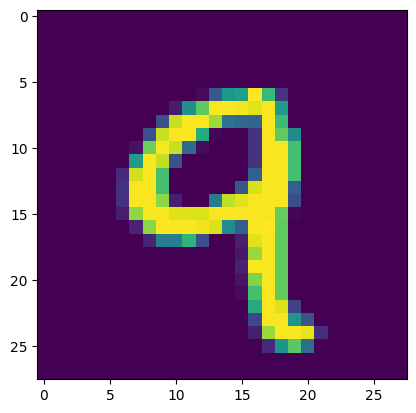

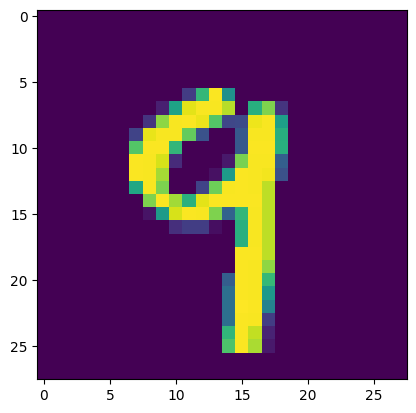

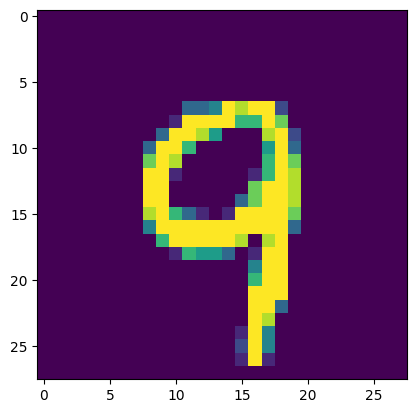

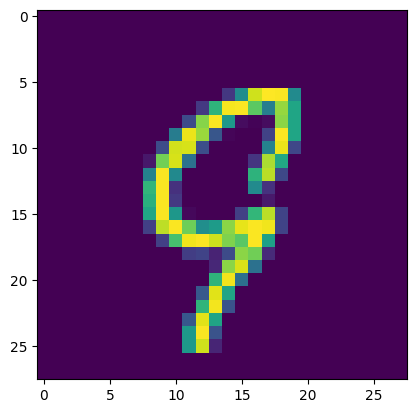

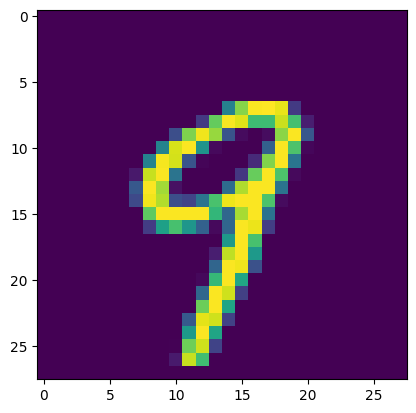

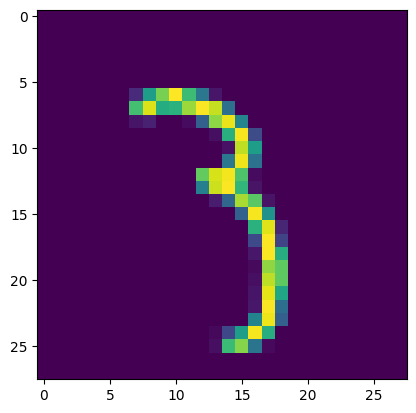

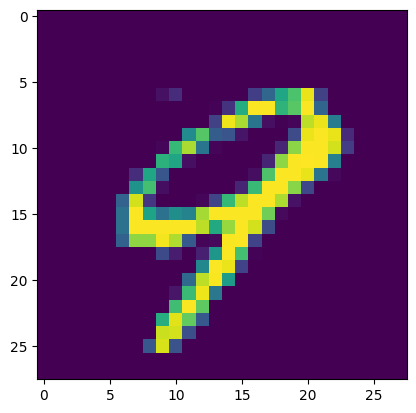

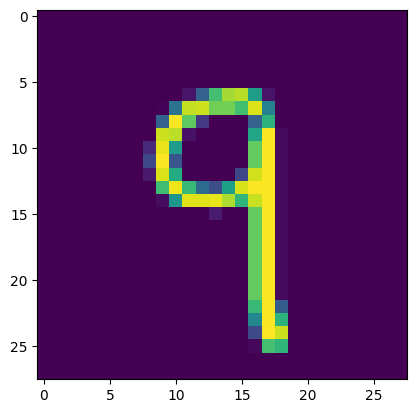

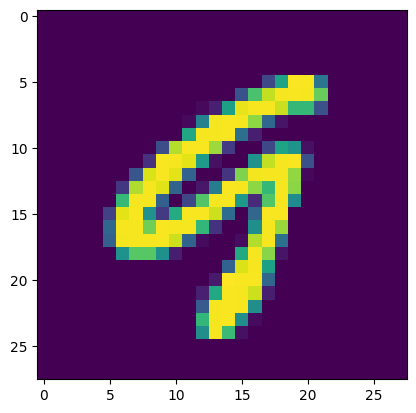

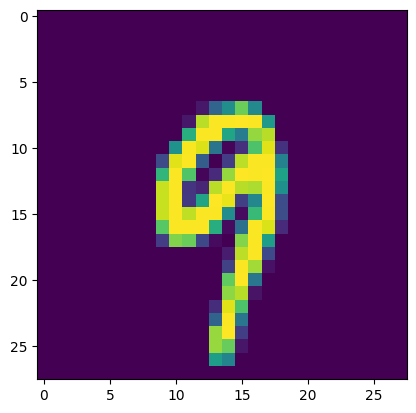

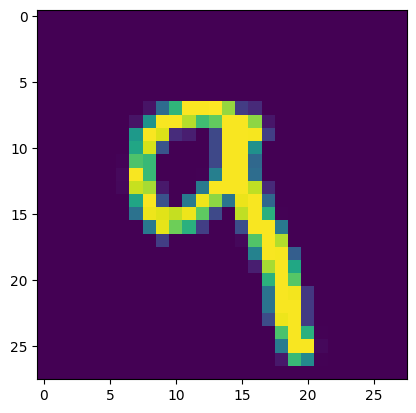

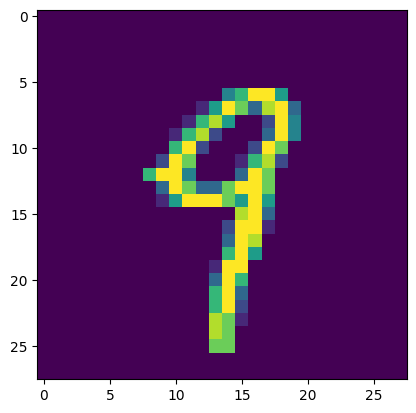

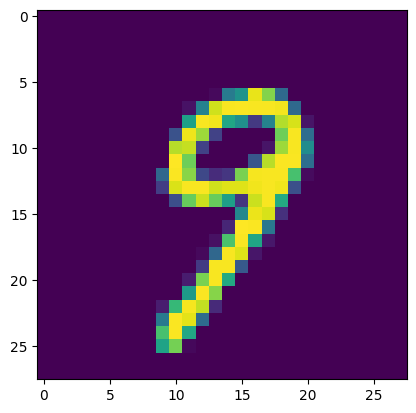

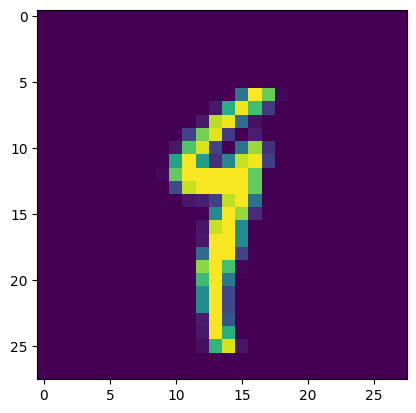

***********************************


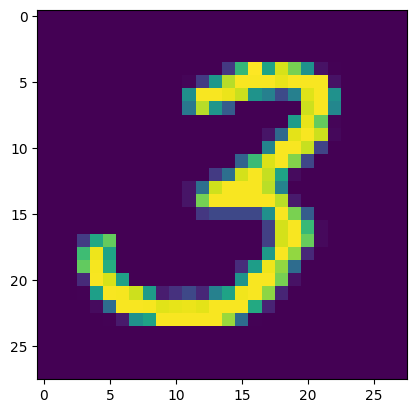

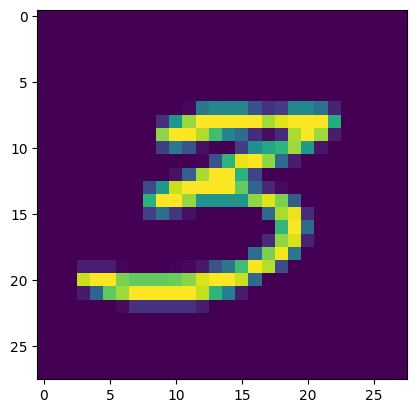

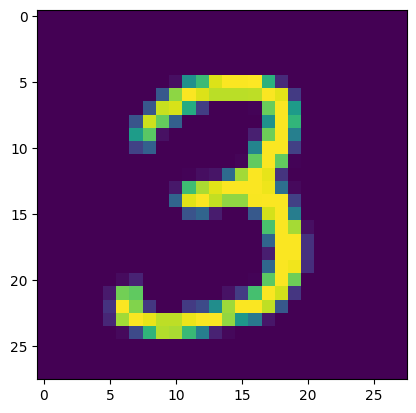

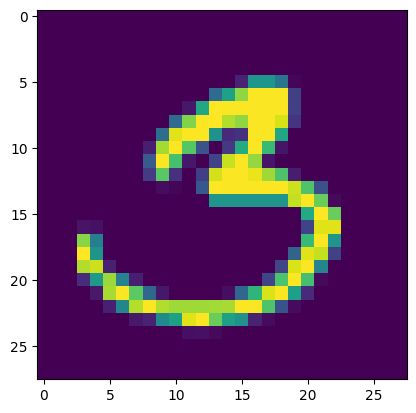

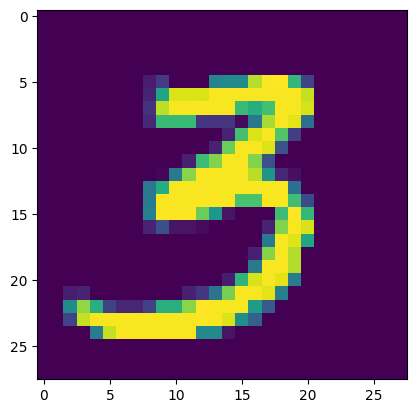

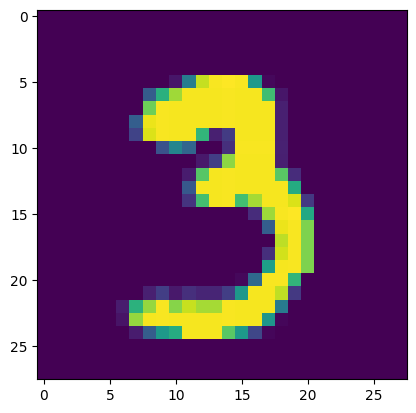

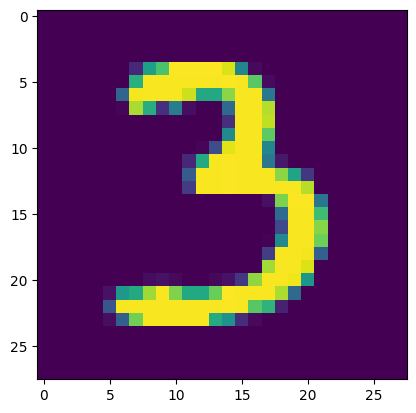

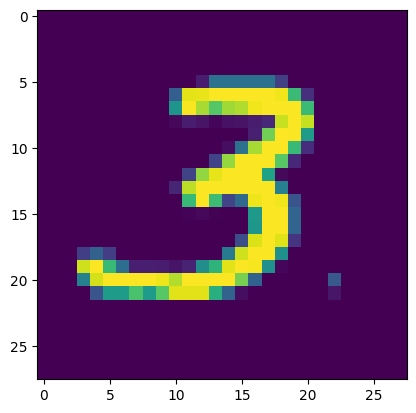

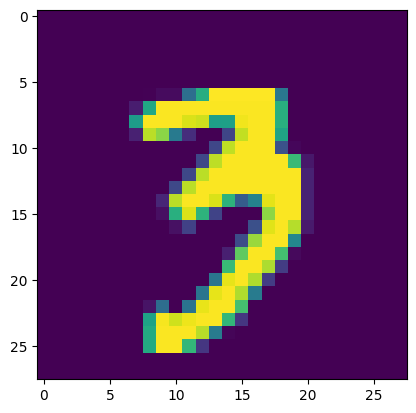

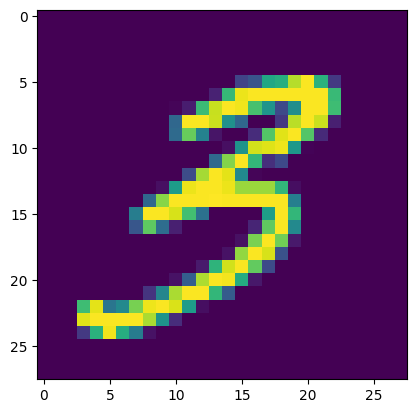

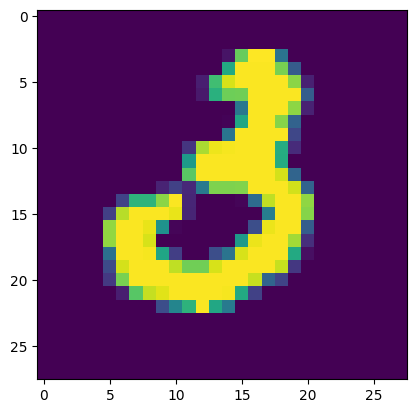

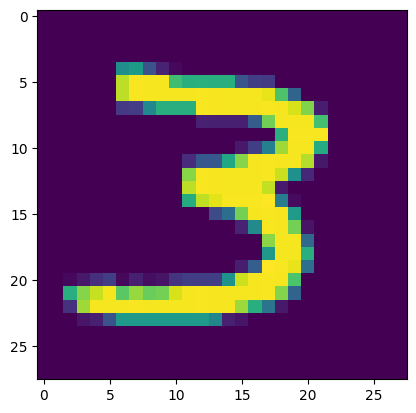

KeyboardInterrupt: 

In [ ]:
#Roughly Checking Cluster
#control k and cluster name(cluster_2_5, cluster_3_5, cluster_5_5, cluster_10_5)
print("*****k=2, dim = 2******")
showImages(2, cluster_2_5, images)
print("*****k=3, dim = 2******")
showImages(3, cluster_3_5, images)
print("*****k=5, dim = 2******")
showImages(5, cluster_5_5, images)
print("*****k=10, dim = 2******")
showImages(10, cluster_10_5, images)

In [ ]:
# This code part: dim 10, k = 2, 3, 5, 10
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#PCA, reduce the dimensions into 10
scaler = StandardScaler()
scaled_data = scaler.fit_transform(images)

pca = PCA(n_components=10)  # reduce the dimension into 10

scaled_images = pca.fit_transform(scaled_data)

# k = 2, dim = 10
cluster_2_10 = kMeans(2, scaled_images)

# k = 3, dim = 10
cluster_3_10 = kMeans(3, scaled_images)

# k = 5, dim = 10
cluster_5_10 = kMeans(5, scaled_images)

# k = 10, dim = 10
cluster_10_10 = kMeans(10, scaled_images)

In [ ]:
#Check if cluster is working properly using the about 10 samples
#control k and cluster name(cluster_2_10, cluster_3_10, cluster_5_10, cluster_10_10)
print("*****k=2, dim = 10******")
showImages(2, cluster_2_10, images)
print("*****k=3, dim = 10******")
showImages(3, cluster_3_10, images)
print("*****k=5, dim = 10******")
showImages(5, cluster_5_10, images)
print("*****k=10, dim = 10******")
showImages(10, cluster_10_10, images)

# ChatGPT prompts

Now solve the same task with ChatGPT with the following prompts:


1.   Can you provide a code to filter the MNIST dataset so that we only have the 9 and 3 samples?
2.   Can you compute the kmeans of this filtered dataset without using any specialized library (coding kmeans from scratch) with k=2,3,5,10?
3.   Can you reduce the dimensionality of the filtered dataset to eigenspaces of dimension 2, 5 and 10 instead of 784?
4.   Can you use the kmeans function from scratch and compute it for the new projected datasets using k=2,3,5 and 10?

**Paste the answer provided and run the code below:**

In [ ]:
import torch
from torchvision import datasets, transforms
import numpy as np

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Function to filter out only the digits 3 and 9
def filter_mnist(dataset, target_digits):
    mask = np.isin(dataset.targets, target_digits)
    filtered_data = dataset.data[mask]
    filtered_targets = dataset.targets[mask]
    return filtered_data, filtered_targets

# Filter the training and test datasets for digits 3 and 9
target_digits = [3, 9]
train_data, train_targets = filter_mnist(mnist_train, target_digits)
test_data, test_targets = filter_mnist(mnist_test, target_digits)

# Convert filtered data back to torch datasets (optional)
class FilteredMNIST(torch.utils.data.Dataset):
    def __init__(self, data, targets, transform=None):
        self.data = data
        self.targets = targets
        self.transform = transform

    def __len__(self):
        return len(self.targets)

    def __getitem__(self, index):
        img, target = self.data[index], int(self.targets[index])
        if self.transform:
            img = self.transform(img)
        return img, target

# Create new datasets for filtered data
filtered_train_dataset = FilteredMNIST(train_data, train_targets, transform=transform)
filtered_test_dataset = FilteredMNIST(test_data, test_targets, transform=transform)

# Now, you can use filtered_train_dataset and filtered_test_dataset
# Example: print the shape of the filtered data
print(f"Filtered training data shape: {train_data.shape}")
print(f"Filtered training targets shape: {train_targets.shape}")

Filtered training data shape: torch.Size([12080, 28, 28])
Filtered training targets shape: torch.Size([12080])


In [ ]:
import numpy as np
import torch

# Euclidean distance function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Initialize k random centroids
def initialize_centroids(data, k):
    # Randomly select k unique indices
    indices = np.random.choice(data.shape[0], size=k, replace=False)
    return data[indices]

# Assign clusters to each data point based on closest centroid
def assign_clusters(data, centroids):
    clusters = np.zeros(data.shape[0])
    for i, point in enumerate(data):
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        clusters[i] = np.argmin(distances)
    return clusters

# Update centroids by calculating the mean of all points assigned to each cluster
def update_centroids(data, clusters, k):
    new_centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        cluster_points = data[clusters == i]
        if len(cluster_points) > 0:
            new_centroids[i] = np.mean(cluster_points, axis=0)
    return new_centroids

# KMeans algorithm implementation
def kmeans(data, k, max_iters=100, tolerance=1e-4):
    centroids = initialize_centroids(data, k)
    for iteration in range(max_iters):
        # Assign clusters based on the current centroids
        clusters = assign_clusters(data, centroids)
        # Compute new centroids
        new_centroids = update_centroids(data, clusters, k)
        # Check for convergence (if centroids do not change much)
        if np.all(np.abs(new_centroids - centroids) < tolerance):
            break
        centroids = new_centroids
    return clusters, centroids

# Filtering MNIST dataset to only include digits 3 and 9
def filter_mnist(dataset, target_digits):
    mask = np.isin(dataset.targets, target_digits)
    filtered_data = dataset.data[mask]
    filtered_targets = dataset.targets[mask]
    return filtered_data, filtered_targets

# Load MNIST data (assumed to be filtered as shown previously)
def prepare_data():
    transform = transforms.Compose([transforms.ToTensor()])
    mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

    # Filter the MNIST dataset to only include 3 and 9 digits
    target_digits = [3, 9]
    train_data, train_targets = filter_mnist(mnist_train, target_digits)

    # Flatten the 28x28 images into 784-dimensional vectors
    train_data = train_data.view(train_data.shape[0], -1).numpy()

    return train_data

# Main function to run KMeans with different k values
def run_kmeans_for_k_values():
    train_data = prepare_data()

    # Run KMeans for different values of k
    for k in [2, 3, 5, 10]:
        print(f"Running KMeans with k={k}")
        clusters, centroids = kmeans(train_data, k)
        print(f"Cluster centers for k={k}:\n", centroids)
        print(f"First 10 cluster assignments: {clusters[:10]}")  # Show first 10 cluster assignments

# Run the main function
run_kmeans_for_k_values()


Running KMeans with k=2
Cluster centers for k=2:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
First 10 cluster assignments: [0. 1. 1. 1. 0. 0. 1. 1. 0. 0.]
Running KMeans with k=3
Cluster centers for k=3:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
First 10 cluster assignments: [2. 0. 0. 1. 2. 2. 0. 1. 2. 2.]
Running KMeans with k=5
Cluster centers for k=5:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
First 10 cluster assignments: [3. 1. 1. 0. 3. 3. 1. 0. 3. 3.]
Running KMeans with k=10
Cluster centers for k=10:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
First 10 cluster assignments: [9. 3. 7. 2. 5. 5. 3. 2. 5. 9.]


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import torch
from torchvision import datasets, transforms

# Function to filter out only the digits 3 and 9 from MNIST
def filter_mnist(dataset, target_digits):
    mask = np.isin(dataset.targets, target_digits)
    filtered_data = dataset.data[mask]
    filtered_targets = dataset.targets[mask]
    return filtered_data, filtered_targets

# Function to prepare the data (filter, flatten)
def prepare_data():
    transform = transforms.Compose([transforms.ToTensor()])
    mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

    # Filter the MNIST dataset to only include 3 and 9 digits
    target_digits = [3, 9]
    train_data, train_targets = filter_mnist(mnist_train, target_digits)

    # Flatten the 28x28 images into 784-dimensional vectors
    train_data = train_data.view(train_data.shape[0], -1).numpy()

    return train_data, train_targets

# Function to reduce dimensionality using PCA
def reduce_dimensionality(data, n_components):
    # Instantiate PCA
    pca = PCA(n_components=n_components)
    # Fit and transform the data
    reduced_data = pca.fit_transform(data)
    return reduced_data

# Main function to run dimensionality reduction with PCA
def run_pca_for_dimensions():
    train_data, train_targets = prepare_data()

    # Run PCA for 2, 5, and 10 dimensions
    for dim in [2, 5, 10]:
        reduced_data = reduce_dimensionality(train_data, dim)
        print(f"PCA reduced data to {dim} dimensions.")
        print(f"Reduced data shape: {reduced_data.shape}\n")

        # Optionally, return or store the reduced data for further clustering or visualization.
        # For now, just printing the shape of the reduced data.

# Run the main function
run_pca_for_dimensions()


PCA reduced data to 2 dimensions.
Reduced data shape: (12080, 2)

PCA reduced data to 5 dimensions.
Reduced data shape: (12080, 5)

PCA reduced data to 10 dimensions.
Reduced data shape: (12080, 10)



PCA reduced data to 2 dimensions.
Running KMeans with k=2 on 2-dimensional data
Cluster centers for k=2 (first two):
 [[-587.0656962   -21.45669055]
 [ 678.18918518   24.78716705]]
First 10 cluster assignments for k=2: [0. 1. 1. 1. 0. 0. 1. 1. 0. 0.]



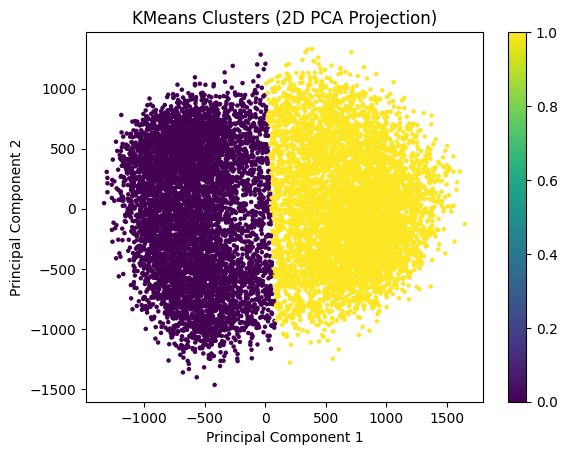

Running KMeans with k=3 on 2-dimensional data
Cluster centers for k=3 (first two):
 [[ 725.51338175   24.78998802]
 [-579.32909851  419.10237241]]
First 10 cluster assignments for k=3: [1. 0. 0. 0. 1. 1. 0. 2. 1. 1.]



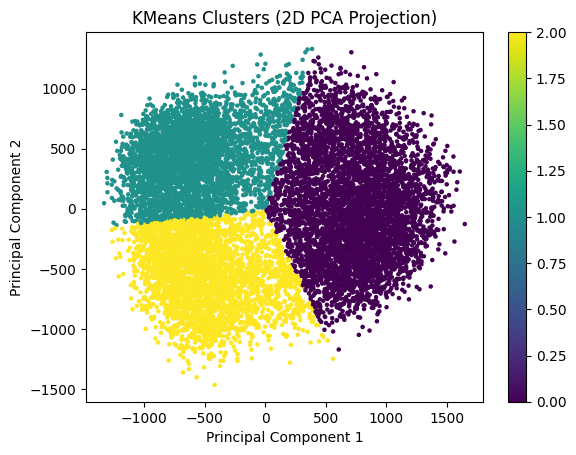

Running KMeans with k=5 on 2-dimensional data
Cluster centers for k=5 (first two):
 [[ 783.06684937 -253.43976963]
 [-361.79340213 -715.6562904 ]]
First 10 cluster assignments for k=5: [4. 3. 3. 0. 2. 2. 0. 1. 2. 2.]



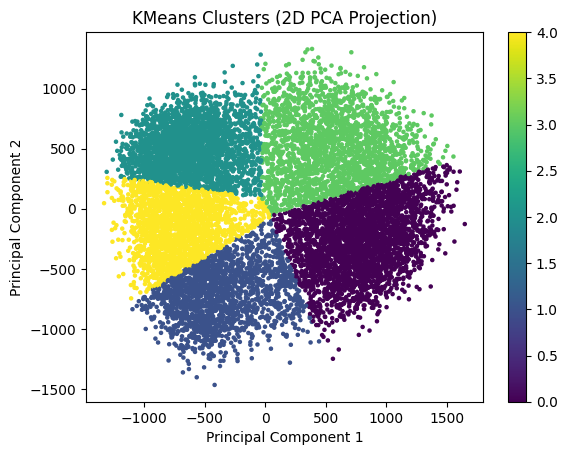

Running KMeans with k=10 on 2-dimensional data
Cluster centers for k=10 (first two):
 [[-493.51777235 -770.03101989]
 [-328.92205159   61.0299548 ]]
First 10 cluster assignments for k=10: [9. 6. 6. 5. 2. 2. 8. 3. 2. 2.]



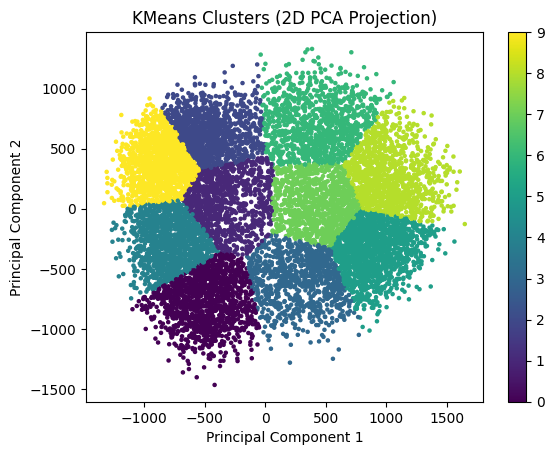

PCA reduced data to 5 dimensions.
Running KMeans with k=2 on 5-dimensional data
Cluster centers for k=2 (first two):
 [[ 676.58836968   27.98039169   19.79453416   23.0928203     5.29433871]
 [-588.02365349  -24.31778742  -17.20345016  -20.06999407   -4.60131526]]
First 10 cluster assignments for k=2: [1. 0. 0. 0. 1. 1. 0. 0. 1. 1.]

Running KMeans with k=3 on 5-dimensional data
Cluster centers for k=3 (first two):
 [[-532.85168739 -544.41745673  139.69839249    2.08348296  216.60424726]
 [ 690.40002631   26.52769842   18.05935293   24.41472557    5.61362296]]
First 10 cluster assignments for k=3: [2. 1. 1. 1. 2. 2. 1. 1. 2. 2.]

Running KMeans with k=5 on 5-dimensional data
Cluster centers for k=5 (first two):
 [[-610.86487508 -630.02017277  396.68578119 -176.23897368  237.46502511]
 [ 755.08632144 -348.33981561 -121.40279559  -77.1852487  -286.64800362]]
First 10 cluster assignments for k=5: [4. 2. 2. 1. 4. 4. 2. 1. 4. 4.]

Running KMeans with k=10 on 5-dimensional data
Cluster cente

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Euclidean distance function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Initialize k random centroids
def initialize_centroids(data, k):
    indices = np.random.choice(data.shape[0], size=k, replace=False)
    return data[indices]

# Assign clusters to each data point based on closest centroid
def assign_clusters(data, centroids):
    clusters = np.zeros(data.shape[0])
    for i, point in enumerate(data):
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        clusters[i] = np.argmin(distances)
    return clusters

# Update centroids by calculating the mean of all points assigned to each cluster
def update_centroids(data, clusters, k):
    new_centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        cluster_points = data[clusters == i]
        if len(cluster_points) > 0:
            new_centroids[i] = np.mean(cluster_points, axis=0)
    return new_centroids

# KMeans algorithm implementation
def kmeans(data, k, max_iters=100, tolerance=1e-4):
    centroids = initialize_centroids(data, k)
    for iteration in range(max_iters):
        # Assign clusters based on the current centroids
        clusters = assign_clusters(data, centroids)
        # Compute new centroids
        new_centroids = update_centroids(data, clusters, k)
        # Check for convergence
        if np.all(np.abs(new_centroids - centroids) < tolerance):
            break
        centroids = new_centroids
    return clusters, centroids

# Filter MNIST dataset to only include 3 and 9 digits
def filter_mnist(dataset, target_digits):
    mask = np.isin(dataset.targets, target_digits)
    filtered_data = dataset.data[mask]
    filtered_targets = dataset.targets[mask]
    return filtered_data, filtered_targets

# Prepare MNIST dataset and apply PCA
def prepare_data():
    transform = transforms.Compose([transforms.ToTensor()])
    mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

    # Filter the MNIST dataset to only include digits 3 and 9
    target_digits = [3, 9]
    train_data, train_targets = filter_mnist(mnist_train, target_digits)

    # Flatten the 28x28 images into 784-dimensional vectors
    train_data = train_data.view(train_data.shape[0], -1).numpy()

    return train_data, train_targets

# Reduce dimensionality using PCA
def reduce_dimensionality(data, n_components):
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(data)
    return reduced_data

# Visualize results for 2D PCA reduced data
def visualize_pca_2d(reduced_data, clusters, targets):
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', s=5)
    plt.colorbar()
    plt.title('KMeans Clusters (2D PCA Projection)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# Main function to run KMeans on different PCA-reduced datasets and different k-values
def run_kmeans_on_pca():
    train_data, train_targets = prepare_data()

    # Define the PCA dimensions to use
    pca_dims = [2, 5, 10]

    for dim in pca_dims:
        reduced_data = reduce_dimensionality(train_data, dim)
        print(f"PCA reduced data to {dim} dimensions.")

        # Run KMeans for different values of k
        for k in [2, 3, 5, 10]:
            print(f"Running KMeans with k={k} on {dim}-dimensional data")
            clusters, centroids = kmeans(reduced_data, k)
            print(f"Cluster centers for k={k} (first two):\n", centroids[:2])
            print(f"First 10 cluster assignments for k={k}: {clusters[:10]}\n")

            # If data is 2D, visualize the clustering
            if dim == 2:
                visualize_pca_2d(reduced_data, clusters, train_targets)

# Run the KMeans on PCA-reduced datasets
run_kmeans_on_pca()


# Report



1.   What are some differences you notice between your code and ChatGPT's? (Name at least 3)
2.   Ask ChatGPT how can you judge if a cluster is correctly computed. Paste the answer here. Do you agree with ChatGPT's statement? Why yes or why not?
3.   Ask ChatGPT how can we know which k is the correct parameter for a kMeans algorithm. Paste the answer here. Do you agree with ChatGPT's statement? Why yes or why not?
4.   Conclude with some thoughts and things you learned from this homework.

<h1>Answer</h1>
1.

- Scatter/Visualization: In 2 dimensions, ChatGPT make a dot graph with clustering. It is possible to create a dot graph because there are x and y line when it is 2 dimensions.
- Filter MNIST: ChatGPT splits the data into 3 and 9 images using np.isin(). It can help me find the data easily.
- Code Structure: I made the code structure for readability. However, ChatGPT made the code structure for efficiency.
2.

I generally agree with these idea. First of all, Within-cluster distance and Between-cluster is a core concepts of inner and outter cluster. When theses concepts are considered together, we can get a better clustering. Second, Elbow method and Visualization are a good approach. Elbow method is a mathematic way to prove it and the concept is very clear and understandable. And visualization is very intuitive. When we use lower-dimensional data, visualization is useful for us to understand it in one glance. However, Cluster interpretability and Silhouette score are carefully considered. Cluster interpretability can be used easily when the data is labeled. But, If the data is labled, better approaches exist. And when the data is not labled, it is based on the domain knowledge. If so, I would rather use a different algorithm. In Silhouette score, we need to think of the reason why all cluster should be similar. In my opinion, if the data is many different, the cluster is also many different.

3.

The methods which decide if k is correct are very similar to the methods which decided if cluster is correctly computed. These methods consist of mathematical approaches, approaches in terms of data, Heuristic approaches, and etc. I generally agree with these ideas the same way I agree with the cluster problem.

4.

- Eventully, Algorithm. General algorithms in CS are the methods to solve some problem using data structure and logical thinking. kMeans is also algorithm and it's just data with dimensions, not formal data like a data structure.
- Understanding Dimension. MNIST image data is [70000, 784]. When I tied to split the data into iamge 3 and 9, I didn't know what is 3 and 9 data. After understanding image data and dimension, I could solve this problem.
- Understanding narray library. If it is C, many things are impossible. But, I was able to calculate some complicated problem easily thanks to narray such as np.argmin and np.where.


## ChatGPT's Answer about Q2

Within-cluster distance (compactness): A well-defined cluster should have minimal variance within itself. You can measure how close the data points in each cluster are to the cluster centroid (e.g., using sum of squared distances). The smaller the distance, the more compact the cluster.

Between-cluster separation: Clusters should be well-separated from each other. You can check how far the centroids are from each other. Larger distances between centroids suggest better separation between clusters.

Silhouette score: This metric calculates how similar a data point is to its own cluster compared to other clusters. Scores range from -1 to 1, where higher values indicate better clustering.

Cluster interpretability: If the data is labeled, compare the cluster assignments to the actual labels. The clusters should correspond well to the natural groups in the data (e.g., digits 3 and 9 in the MNIST dataset). For unsupervised data, interpretability could be based on domain knowledge.

Elbow method: Plot the sum of squared distances from points to their assigned cluster centers for different numbers of clusters (k). The point at which adding more clusters doesn’t significantly reduce the sum of squared distances indicates the "optimal" number of clusters.

Visualization (for 2D or 3D data): For lower-dimensional data, visual inspection can be useful. You should be able to see clear separations between clusters, and points should group around centroids.

## ChatGPT's Answer about Q3
Determining the correct value of \( k \) (the number of clusters) for a KMeans algorithm is not always straightforward. Here are several methods and guidelines commonly used to identify the optimal \( k \):

### 1. **Elbow Method**
   - **How it works**: Plot the sum of squared distances (also called inertia or distortion) from each point to its assigned centroid as a function of \( k \).
   - **What to look for**: As \( k \) increases, the within-cluster variance decreases. The "elbow" of the plot is the point where the decrease in variance starts to slow down significantly, indicating diminishing returns for adding more clusters. This point is considered a good estimate for the optimal \( k \).
   - **Why it works**: It identifies a balance between minimizing the number of clusters and maximizing the compactness of the clusters.

### 2. **Silhouette Score**
   - **How it works**: The silhouette score measures how similar a data point is to its own cluster (cohesion) compared to other clusters (separation). It ranges from -1 to 1.
   - **What to look for**: A silhouette score close to 1 indicates well-separated and compact clusters. A score near 0 means the clusters are overlapping, while negative values suggest wrong cluster assignments.
   - **Why it works**: It balances within-cluster compactness and separation between clusters, helping find a \( k \) that yields well-defined clusters.

### 3. **Gap Statistic**
   - **How it works**: The gap statistic compares the within-cluster dispersion for different values of \( k \) with that expected under a null reference distribution of the data (random distribution). The larger the gap, the better the clustering is compared to random noise.
   - **What to look for**: Select \( k \) where the gap statistic is largest.
   - **Why it works**: It provides a more statistically grounded method to select \( k \) and compares actual clusters with clusters that might arise from random data.

### 4. **Cross-Validation**
   - **How it works**: Use cross-validation techniques, splitting the data into training and validation sets, and evaluate how the KMeans algorithm performs for different values of \( k \).
   - **What to look for**: Choose the \( k \) that performs best on the validation set (e.g., minimizes within-cluster variance or maximizes a specific metric).
   - **Why it works**: This method ensures that the chosen \( k \) generalizes well to unseen data, avoiding overfitting to noise or random variations.

### 5. **BIC/AIC (Bayesian/ Akaike Information Criterion)**
   - **How it works**: These criteria add penalties for model complexity (such as increasing \( k \)) to the likelihood of the model.
   - **What to look for**: Select the value of \( k \) that minimizes either the BIC or AIC.
   - **Why it works**: It accounts for both the goodness of fit and the simplicity of the model, helping to avoid overfitting by choosing too many clusters.

### 6. **Domain Knowledge or Heuristic**
   - **How it works**: In some cases, you might have prior knowledge or expectations about the number of clusters. For instance, if you’re clustering types of customers in marketing, there may be a natural grouping based on demographics or buying behavior.
   - **What to look for**: Use a combination of domain knowledge and clustering results to select \( k \).
   - **Why it works**: Domain knowledge helps ensure that the clusters are meaningful in the context of the problem.

### 7. **Davies-Bouldin Index**
   - **How it works**: This metric evaluates how well clusters are separated by measuring the ratio of within-cluster scatter to between-cluster separation.
   - **What to look for**: A lower Davies-Bouldin Index indicates better clustering. You can use this metric to select the optimal \( k \).
   - **Why it works**: It balances intra-cluster compactness and inter-cluster distance, helping to find well-separated clusters.

### 8. **Dunn Index**
   - **How it works**: The Dunn Index is the ratio of the minimum inter-cluster distance to the maximum intra-cluster distance.
   - **What to look for**: A higher Dunn Index indicates better cluster separation. Use this to select \( k \) where the index is maximized.
   - **Why it works**: It seeks a balance between tight clusters and large separation between clusters.

### Conclusion:
There is no single correct answer to choosing \( k \) for KMeans, but methods like the **Elbow Method**, **Silhouette Score**, and **Gap Statistic** are commonly used for a more objective assessment. Domain knowledge also plays a crucial role in interpreting the clustering results, ensuring that the clusters are meaningful for the specific context.